In [42]:
from Bio import SeqIO   
import matplotlib as plt
import matplotlib.pyplot as plt  

In [43]:
PATH_NEAN  = "sequencenean.fasta"
PATH_HUMAN = "sequencechel.fasta"

In [44]:
# .seq — объект Seq (не строка), поэтому явно приводим к str
nean_seq  = str(SeqIO.read(PATH_NEAN,  "fasta").seq)
human_seq = str(SeqIO.read(PATH_HUMAN, "fasta").seq)

print(f"Неандерталец: {len(nean_seq)} нуклеотидов")
print(f"Человек: {len(human_seq)} нуклеотидов")

Неандерталец: 16565 нуклеотидов
Человек: 16569 нуклеотидов



**Dot-plot** — простой способ сравнить две последовательности визуально.  Ставим точку в координату `(j, i)`, если в позиции `i` последовательности A и в позиции `j` последовательности B начинается совпадающий блок длины ≥ threshold.
- Точки на **главной диагонали** → последовательности схожи и устроены одинаково  
- **Параллельные диагонали** → повторы  
- **Антидиагонали** → инверсии  
Ищем именно **максимальные** общие подстроки: такие, которые нельзя расширить  
ни влево, ни вправо. 

In [45]:
def scan_common_segments(ref, query, threshold=15):
    """
    Ищет все максимальные общие подстроки длиннее threshold.

    Параметры
    ----------
    ref : строка-референс (неандерталец)
    query: строка-запрос   (человек)
    threshold: минимальная длина совпадения

    Возвращает
    ----------
    list of (pos_ref, pos_query, length)
    """
    hits   = []
    n_ref  = len(ref)
    n_quer = len(query)

    for r in range(n_ref):          # стартовая позиция в ref
        for q in range(n_quer):     # стартовая позиция в query
            run = 0
            while (r + run < n_ref            # не вышли за конец ref
                   and q + run < n_quer       # не вышли за конец query
                   and ref[r+run] == query[q+run]):   # символы совпадают
                run += 1
            if run <= threshold:
                continue
            left_ok  = (r == 0) or (q == 0) or (ref[r-1] != query[q-1])
            right_ok = (r+run == n_ref) or (q+run == n_quer) or (ref[r+run] != query[q+run])

            if left_ok and right_ok:
                hits.append((r, q, run))

    return hits

In [46]:
def draw_dotplot(segments, xlabel, ylabel, title):
    """
    Строит dot-plot по списку найденных совпадающих блоков.
    """
    xs = [seg[1] for seg in segments]   # pos_query - ось X (человек)
    ys = [seg[0] for seg in segments]   # pos_ref - ось Y (неандерталец)

    plt.figure(figsize=(7, 7))
    plt.scatter(xs, ys, s=1, c="steelblue", alpha=0.6)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.show()

Найдено блоков (min_len=10): 342


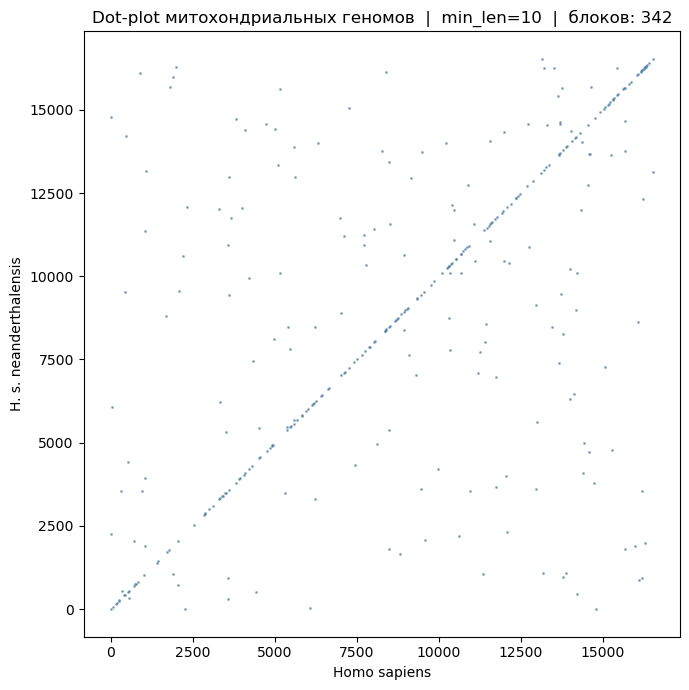

In [47]:
# Порог 10 
segments_10 = scan_common_segments(nean_seq, human_seq, threshold=10)
print(f"Найдено блоков (min_len=10): {len(segments_10)}")

draw_dotplot(
    segments_10,
    xlabel="Homo sapiens",
    ylabel="H. s. neanderthalensis",
    title=f"Dot-plot митохондриальных геномов  |  min_len=10  |  блоков: {len(segments_10)}"
)

Найдено блоков (min_len=15): 163


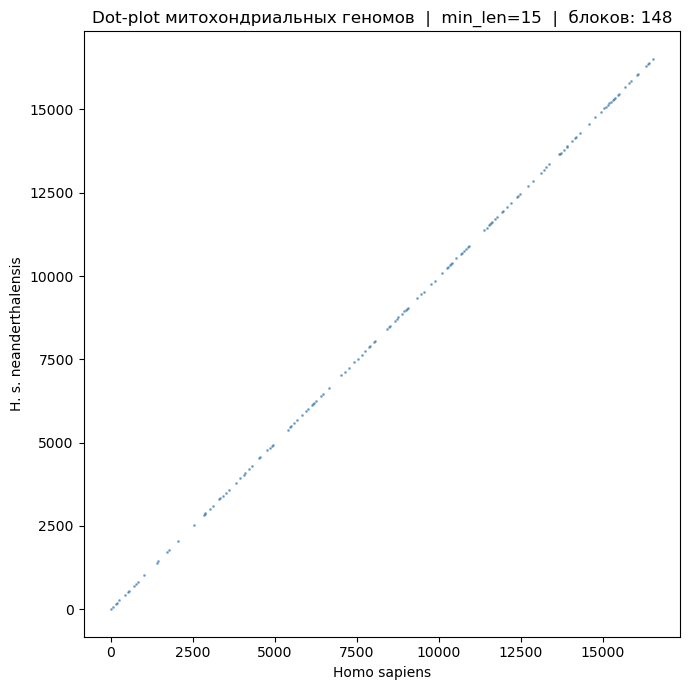

In [48]:
# Порог 20 — оставляем только более длинные, значимые совпадения.
# Случайный шум уходит, структура становится чище
segments_20 = scan_common_segments(nean_seq, human_seq, threshold=20)
print(f"Найдено блоков (min_len=15): {len(segments_15)}")

draw_dotplot(
    segments_20,
    xlabel="Homo sapiens",
    ylabel="H. s. neanderthalensis",
    title=f"Dot-plot митохондриальных геномов  |  min_len=15  |  блоков: {len(segments_20)}"
)

**Вывод**

На обоих dot-plot точки концентрируются вдоль главной диагонали: это говорит о том, что митохондриальные геномы человека и неандертальца сохранили один и тот же порядок блоков (крупных структурных перестроек: инверсий, делеций или дупликаций между митохондриальными геномами человека и неандертальца не наблюдается). При пороге 10 на графике заметен дополнительный «фон» - короткие совпадающие мотивы, которые встречаются в нескольких местах обоих геномов.  
Это характерная черта митохондриальной ДНК: она содержит  повторяющиеся регуляторные элементы и консервативные кодирующие участки, поэтому случайных коротких совпадений много.
При пороге 15 этот шум убирается, и диагональ становится более чёткой.